# ML AUTOMATIC

In [82]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import catboost
from catboost import CatBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier
import xgboost
from xgboost import XGBClassifier

In [83]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [84]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [85]:
y = df["Outcome"]

In [86]:
X = df.drop(["Outcome"], axis=1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

In [88]:
X_Scaled_Train = StandardScaler().fit(X_train).transform(X_train)

In [89]:
X_Scaled_Test = StandardScaler().fit(X_test).transform(X_test)

In [90]:
log_model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [91]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [92]:
svm_model = SVC().fit(X_train, y_train)

In [93]:
ann_model = MLPClassifier(max_iter=10000).fit(X_Scaled_Train, y_train)

In [94]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [95]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [96]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [97]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [98]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [99]:
cat_model = CatBoostClassifier(verbose=False).fit(X_train, y_train)

In [104]:
modeller = [log_model,
            knn_model,
            svm_model, 
            ann_model, 
            cart_model,
            rf_model,
            gbm_model,
            xgb_model,
            lgbm_model, 
            cat_model]

sonuc = list()
sonuclar = pd.DataFrame(columns=["Models", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns=["Models", "Accuracy"])
    sonuclar = sonuclar.append(sonuc)

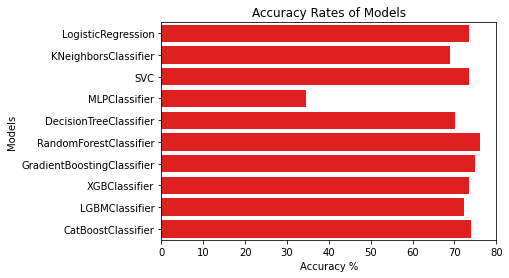

In [105]:
sns.barplot(x="Accuracy", y="Models", data=sonuclar, color="r")
plt.xlabel("Accuracy %")
plt.title("Accuracy Rates of Models");

In [106]:
sonuclar

,Models,Accuracy
0,LogisticRegression,73.593074
0,KNeighborsClassifier,68.831169
0,SVC,73.593074
0,MLPClassifier,34.632035
0,DecisionTreeClassifier,70.129870
0,RandomForestClassifier,76.190476
0,GradientBoostingClassifier,74.891775
0,XGBClassifier,73.593074
0,LGBMClassifier,72.294372
0,CatBoostClassifier,74.025974


# BUNDAN SONRA NE YAPMALI
1. değişken türetme / değişken mühendisliği
2. değişken seçmek
3. Otomatik ML
4. Model Deployment
